### ML-A1 Implementation of Linear regression
- Instructions
    - Prepare a report to present your findings 
    - Write a python code to implement stochastic gradient descent from scratch for the given house price prediction dataset.
    - Write a python code to implement stochastic gradient descent using scikit-learn for the given data and compare the output.
    - Write a python code to implement batch gradient descent from scratch and also using scikit-lean for the given house price prediction.
    - Compare the output of all the implementations and write conclusion.

    Dataset: [House Price Prediction Challenge (kaggle.com)](https://www.kaggle.com/datasets/anmolkumar/house-price-prediction-challenge/data)

- Submission Intruction:
    - Submission should include python notebook file for all the implementations.
    - There must be a report pdf file to illustrate your data science lifecycle implementation and present your finds. Report must not exceed 10 page or 1500 words. 


#### Table of Content
1. Problem Statement
2. Data Understanding
3. Data Preparation
4. Modeling  
  4.1. SGD using scikit-learn   
  4.2  SGD Scratch Implementation  
  4.2  Batch Gradient Descent using scikit-learn   
  4.3  Batch Gradient Descent Scratch Implementation   

#### Data Ingestion/Loading
- Load the necessary modules
- Load the data
- process the data


## Stocastic Gradient Descent Implmentation

In [1]:
# loading the library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

plt.rcParams['figure.figsize'] = (18,6)


np.random.seed(32)
# data path
train_data  = "/home/suman/Applied-Machine-Learning/Linear Regression/train.csv"
test_data = "/home/suman/Applied-Machine-Learning/Linear Regression/test.csv"

# load the train and test data
df_train  = pd.read_csv(train_data)
df_test = pd.read_csv(test_data)

df_train.head()


,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


#### Data Understanding and Exploration
The dataset used for this assignmetn is from Kaggle Dataset: [House Price Prediction Challenge (kaggle.com)](https://www.kaggle.com/datasets/anmolkumar/house-price-prediction-challenge/data)

- **Training Splits:** 29451 rows x 12 columns
- **Testing Splits:** 68720 x 11 columns
  - since we are using compettion data testing data do not contain the labels, they are evaluated based on this splits.
  
- **Attributes of the Dataset**


    | Column               | Description                                      |
    |----------------------|--------------------------------------------------|       
    | POSTED_BY            | Category marking who has listed the property     |
    | UNDER_CONSTRUCTION   | Under Construction or Not                        |
    | RERA                 | Rera approved or Not                             |
    | BHK_NO               | Number of Rooms                                  |
    | BHK_OR_RK            | Type of property                                 |
    | SQUARE_FT            | Total area of the house in square feet           |
    | READY_TO_MOVE        | Category marking Ready to move or Not            |
    | RESALE               | Category marking Resale or not                   |
    | ADDRESS              | Address of the property                          |
    | LONGITUDE            | Longitude of the property                        |
    | LATITUDE             | Latitude of the property                         |
  
 RERA stands for Real Estate (Regulation and Development) Act, which was enacted by the Indian government in 2016. It aims to protect home buyers and ensure transparency in the real estate sector. RERA establishes regulatory authorities at the state level to oversee real estate transactions and address grievances.


In [2]:
print(f'The train dataset contains {df_train.shape[0]} rows and {df_train.shape[1]} columns.')
print(f'The test dataset contains {df_test.shape[0]} rows and {df_test.shape[1]} columns.')

The train dataset contains 29451 rows and 12 columns.
The test dataset contains 68720 rows and 11 columns.


In [3]:
# info of the dateset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


- since we are solving linear regression problem, the target or dependent variable must be continous and here we can see that it is continous
- rest we can see that there are total of three dtypes
- there are two categorical variable which are useful: `BHK_OR_RK` and `POSTED_BY`              

#### Exploration and Descriptive Statistics

In [4]:
df_train.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000
mean,0.179756,0.317918,2.392279,1.980217e+04,0.820244,0.929578,21.300255,76.837695,142.898746
std,0.383991,0.465675,0.879091,1.901335e+06,0.383991,0.255861,6.205306,10.557747,656.880713
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,9.000211e+02,1.000000,1.000000,18.452663,73.798100,38.000000
50%,0.000000,0.000000,2.000000,1.175057e+03,1.000000,1.000000,20.750000,77.324137,62.000000
75%,0.000000,1.000000,3.000000,1.550688e+03,1.000000,1.000000,26.900926,77.828740,100.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000


In [5]:
# categorical data

df_train.describe(exclude=["float", "int"])

,POSTED_BY,BHK_OR_RK,ADDRESS
count,29451,29451,29451
unique,3,2,6899
top,Dealer,BHK,"Zirakpur,Chandigarh"
freq,18291,29427,509


In [6]:
# check for null values
df_train.isnull().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

##### Interpretations:
- there are numerical and categorical variables
- the dataset have no missing records (since this is competition data it is already been curated)
- target/depedent variable is continous (as float dtype)

#### Basic EDA

In [7]:
df_train['POSTED_BY'].value_counts()

POSTED_BY
Dealer     18291
Owner      10538
Builder      622
Name: count, dtype: int64

In [8]:
df_train['UNDER_CONSTRUCTION'].value_counts()

UNDER_CONSTRUCTION
0    24157
1     5294
Name: count, dtype: int64

<BarContainer object of 2 artists>

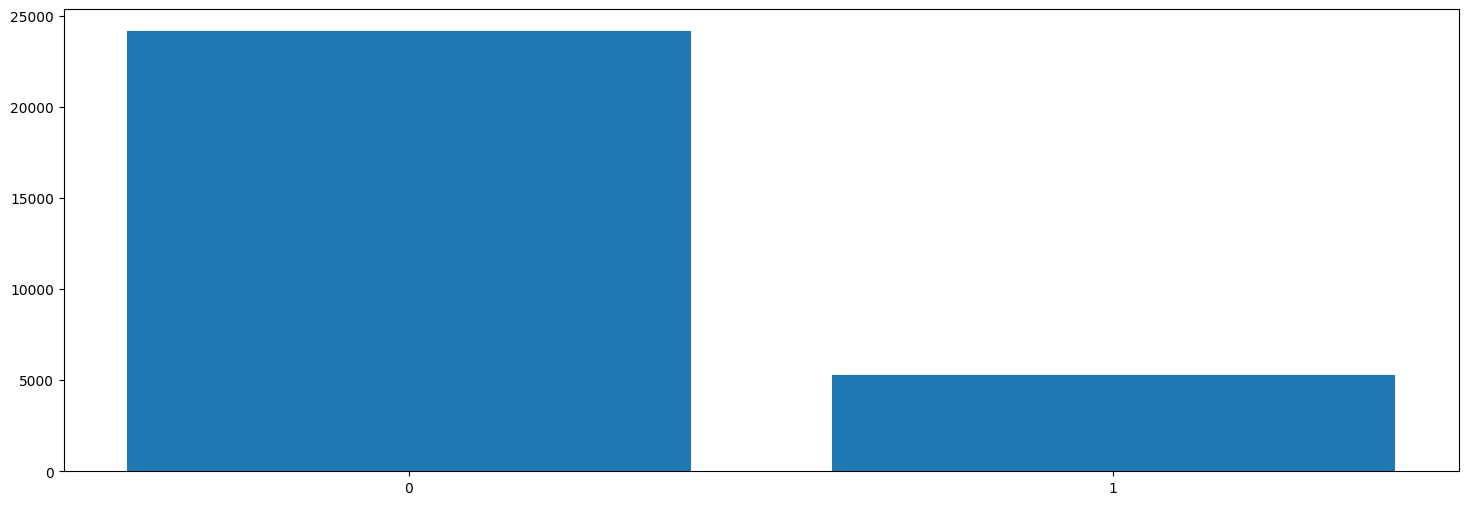

In [9]:
plt.bar(["0","1"],df_train["UNDER_CONSTRUCTION"].value_counts())

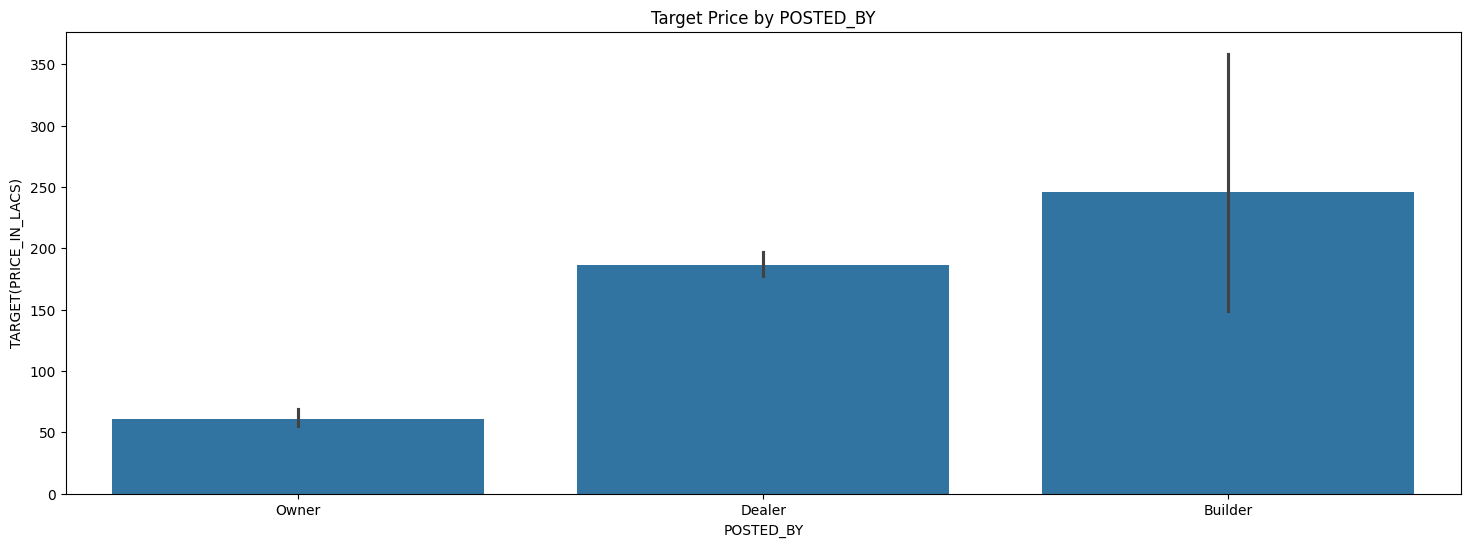

In [10]:
sns.barplot(x='POSTED_BY', y='TARGET(PRICE_IN_LACS)', data=df_train)
plt.title('Target Price by POSTED_BY')
plt.show()

# looks like majority of the property listinga re made dealers

<Axes: xlabel='TARGET(PRICE_IN_LACS)', ylabel='Count'>

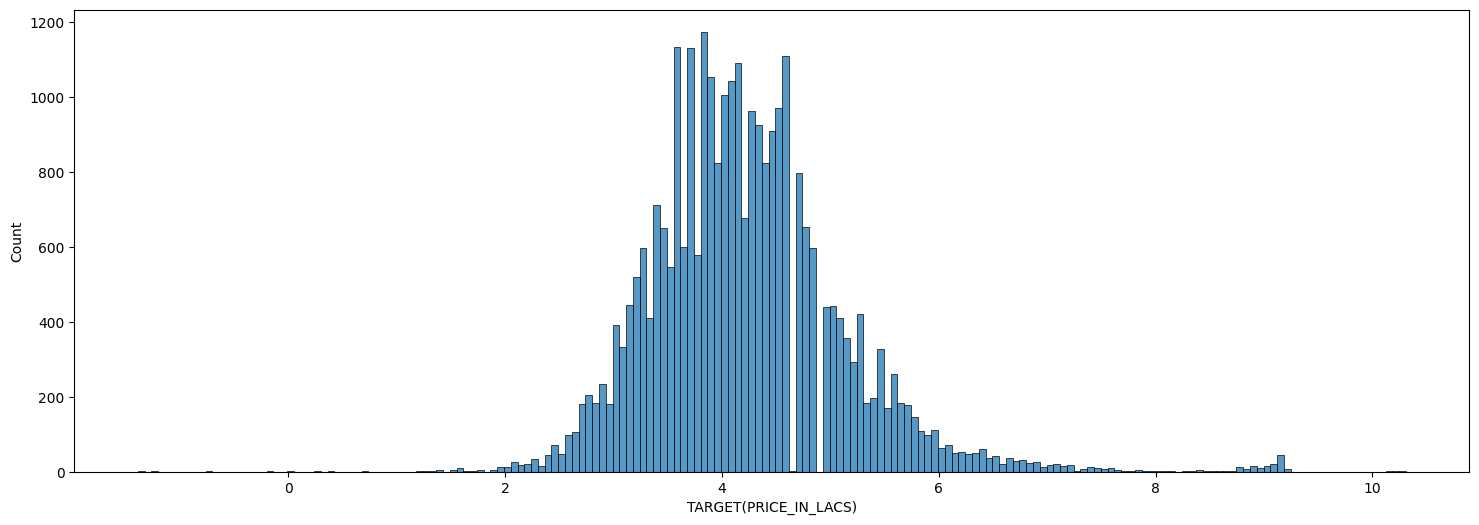

In [11]:
sns.histplot(np.log(df_train["TARGET(PRICE_IN_LACS)"]))

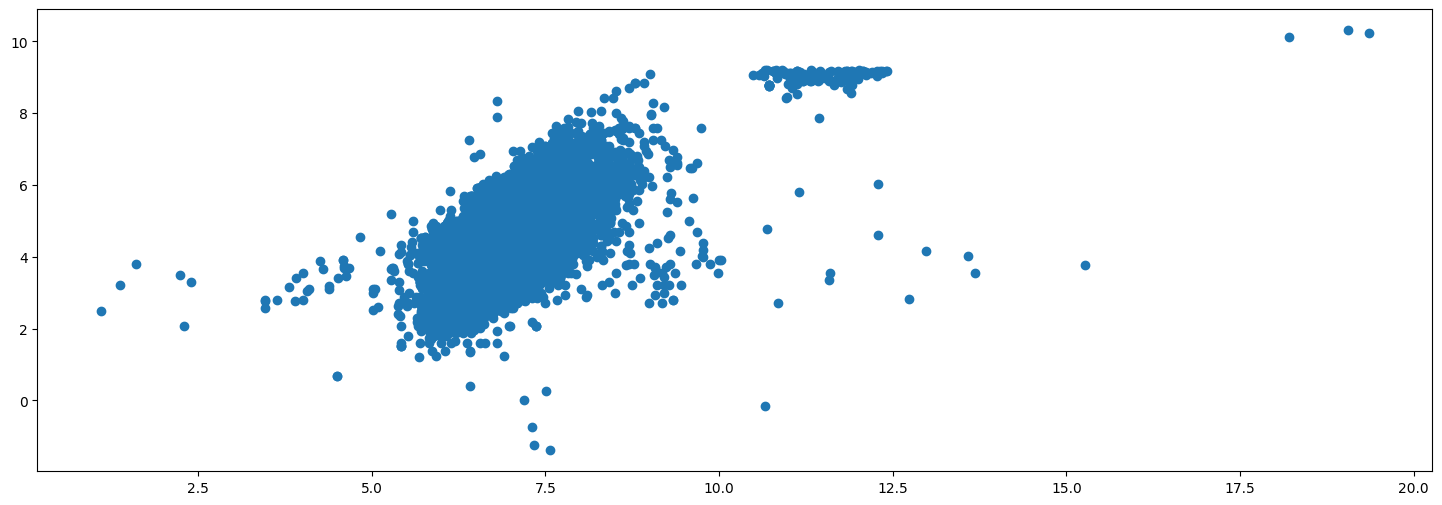

In [12]:
# check the relationship between square ft and the price
# does sqaure ft influences price?
plt.scatter(x=np.log(df_train["SQUARE_FT"]), y=np.log(df_train["TARGET(PRICE_IN_LACS)"]))

# looks like it does

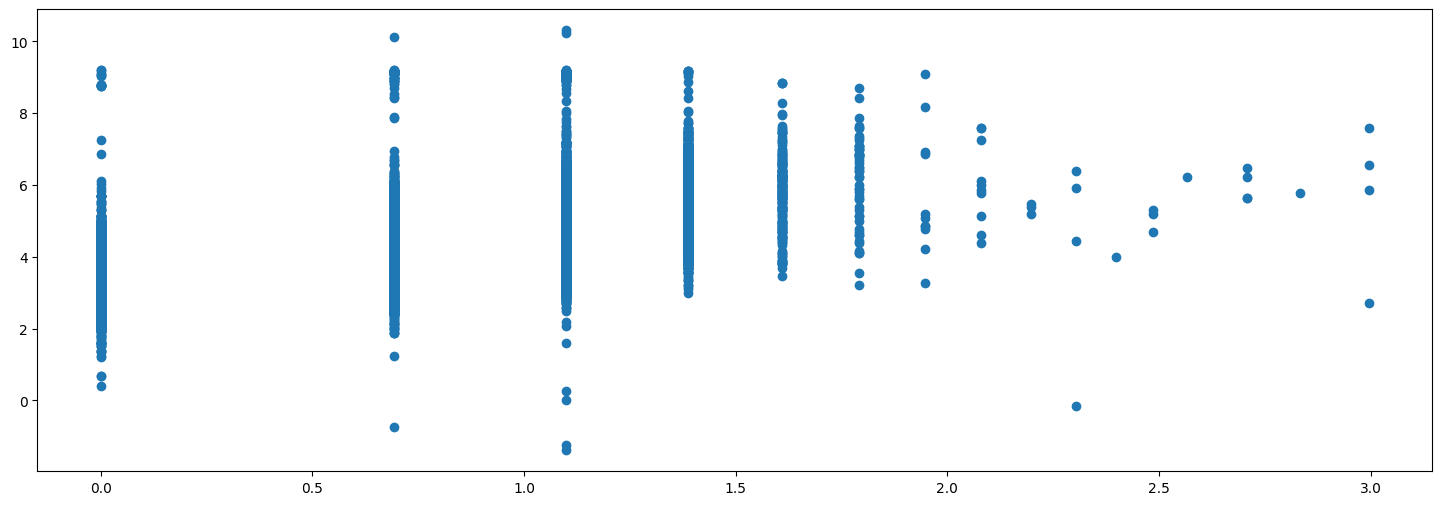

In [13]:
plt.scatter(x=np.log(df_train["BHK_NO."]), y=np.log(df_train["TARGET(PRICE_IN_LACS)"]))

In [14]:
# which city is most popular?
new_df = df_train['ADDRESS'].str.split(',').str.get(1)
city_counts = new_df.value_counts().head(5)


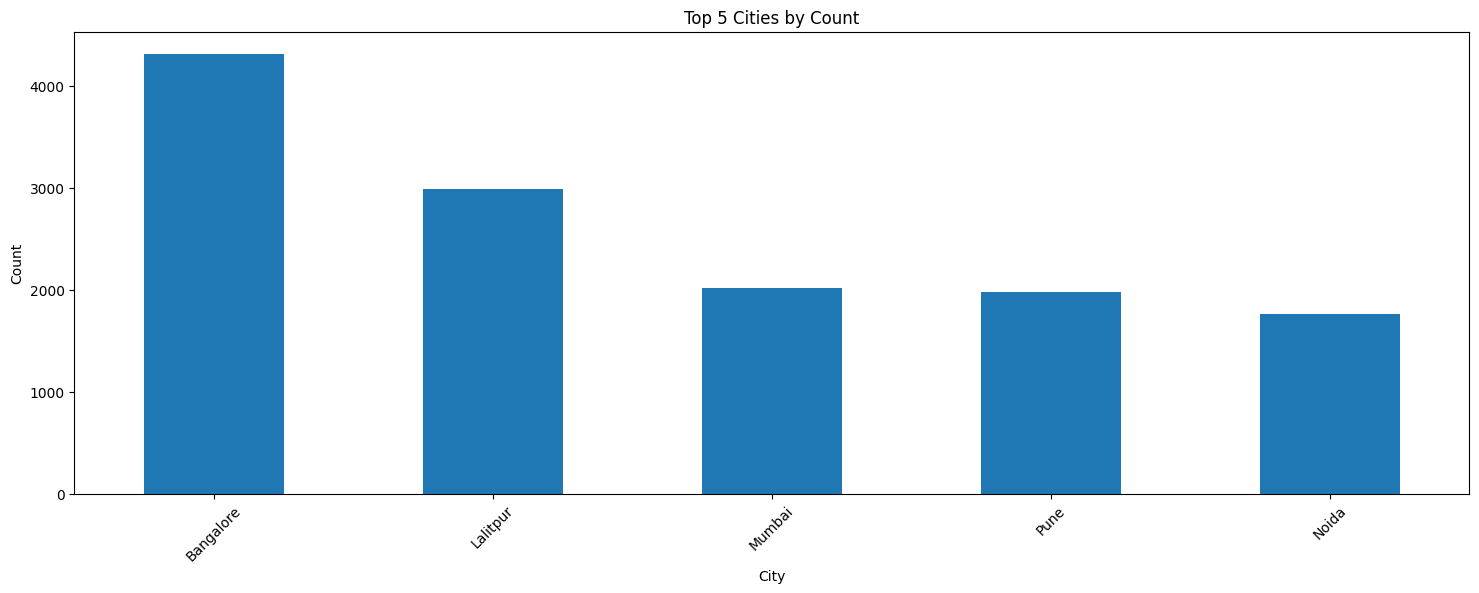

In [15]:
city_counts.plot(kind='bar')
plt.title('Top 5 Cities by Count')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [16]:
# make a copy so that we need not have to restart the notebook should we mess up the data.
df_train_copy = df_train.copy()

#### Data Preprocessing
- Check Missing Data
    - since there is no missing data, we skip this part.
- Check any redundant data, if present drop them
- Standardization/Normalization
- Encoding the Categorical Variables

In [17]:
df_train.duplicated().sum()
print(f"There are {df_train[df_train.duplicated()].shape[0]} duplicates in training dataset.")


There are 401 duplicates in training dataset.


In [18]:
# let's drop the duplicates
df_train.drop_duplicates(inplace=True)

In [19]:
df_train.duplicated().sum()

0

In [20]:
# now let's remove the uwanted columns, as they do
df_train = df_train.drop(['ADDRESS'], axis=1)


#### Encoding Categorical Variable

In [21]:

from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

# Label encoding function
def label_encoder(X):
    X_transformed = X.copy()
    for column in X.columns:
        le = LabelEncoder()
        X_transformed[column] = le.fit_transform(X[column])
    return X_transformed



In [22]:
# Define the preprocessing steps for categorical features
categorical_features = ['POSTED_BY', 'BHK_OR_RK']
categorical_transformer = Pipeline(steps=[
    ('label_encoder', FunctionTransformer(label_encoder, validate=False))
])


#### Standardizing

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
# Define the preprocessing steps for numerical features
numerical_features_standard = ['BHK_NO.', 'SQUARE_FT', 'LONGITUDE', 'LATITUDE']
numerical_transformer_standard = Pipeline(steps=[
    ('standard_scaler', StandardScaler())
])


In [25]:
# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('categorical', categorical_transformer, categorical_features),
        ('numerical', numerical_transformer_standard, numerical_features_standard)
    ],
    remainder='passthrough'  
)


#### Pipelining

In [26]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [27]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', SGDRegressor(max_iter=1, tol=None, warm_start=True))
])

In [28]:
LABELS = 'TARGET(PRICE_IN_LACS)'
train_features = [col for col in df_train.columns if col not in [LABELS]]
train_data = df_train[train_features]
train_labels = df_train[LABELS]

####  Splitting the dataset

In [29]:
train_data, valid_data, train_labels, valid_labels = train_test_split(train_data, train_labels, random_state=42, test_size = 0.2)

print(f"The shape of training dataset is: {train_data.shape}")
print(train_data.shape)


print(f"The shape of training dataset is: {train_data.shape}")
print(valid_data.shape)


The shape of training dataset is: (23240, 10)
(23240, 10)
The shape of training dataset is: (23240, 10)
(5810, 10)


In [30]:
test_features = [col for col in df_test.columns if col not in [LABELS]]
test_data = df_test[test_features]


#### Finding the best hyperparameters

In [31]:
# initial search
param_grid = {
    'regressor__loss': ['squared_error'],
    'regressor__penalty': ['l2', 'l1'],
    'regressor__alpha': [0.0001, 0.001, 0.01],
    'regressor__l1_ratio': [0.0, 0.1, 0.5],
    'regressor__eta0': [0.001, 0.01, 0.1],
}


In [32]:
from sklearn.model_selection import GridSearchCV

In [33]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5,
                           scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(train_data, train_labels)


/home/suman/.conda/envs/documentai/lib/python3.12/site-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('categorical',
                                                                         Pipeline(steps=[('label_encoder',
                                                                                          FunctionTransformer(func=<function label_encoder at 0x7f26d8931800>))]),
                                                                         ['POSTED_BY',
                                                                          'BHK_OR_RK']),
                                                                        ('numerical',
                                                                         Pipeline(steps=[('standard_scaler',
                                                                                          StandardScaler())]),
                                                                         ['BHK_NO.',
                                                                          'SQUARE_FT',
                                                                          'LONGITUDE',
                                                                          'LATITUDE'])])),
                                       ('regressor',
                                        SGDRegressor(max_iter=1, tol=None,
                                                     warm_start=True))]),
             n_jobs=-1,
             param_grid={'regressor__alpha': [0.0001, 0.001, 0.01],
                         'regressor__eta0': [0.001, 0.01, 0.1],
                         'regressor__l1_ratio': [0.0, 0.1, 0.5],
                         'regressor__loss': ['squared_error'],
                         'regressor__penalty': ['l2', 'l1']},
             scoring='neg_mean_squared_error')

In [34]:
best_parameters = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f'The best model is : {best_model} with parameters {best_parameters}')

The best model is : Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('categorical',
                                                  Pipeline(steps=[('label_encoder',
                                                                   FunctionTransformer(func=<function label_encoder at 0x7f26d8931800>))]),
                                                  ['POSTED_BY', 'BHK_OR_RK']),
                                                 ('numerical',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler())]),
                                                  ['BHK_NO.', 'SQUARE_FT',
                                                   'LONGITUDE',
                                                   'LATITUDE'])])),
                ('regressor',
                 SGDRegressor(alpha=0.01, eta

In [35]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', SGDRegressor(alpha= 0.0001, eta0= 0.001, l1_ratio = 0.0,
                               loss= 'squared_error', penalty= 'l1',
                               tol= 0.01, max_iter=2000, warm_start=True))
])

#### Fit the model with best parameters and estimate

In [36]:
pipeline.fit(train_data, train_labels)

/home/suman/.conda/envs/documentai/lib/python3.12/site-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('categorical',
                                                  Pipeline(steps=[('label_encoder',
                                                                   FunctionTransformer(func=<function label_encoder at 0x7f26d8931800>))]),
                                                  ['POSTED_BY', 'BHK_OR_RK']),
                                                 ('numerical',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler())]),
                                                  ['BHK_NO.', 'SQUARE_FT',
                                                   'LONGITUDE',
                                                   'LATITUDE'])])),
                ('regressor',
                 SGDRegressor(eta0=0.001, l1_ratio=0.0, max_iter=2000,
                              penalty='l1', tol=0.01, warm_start=True))])

In [37]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', SGDRegressor(alpha= 0.0001, eta0= 0.001, l1_ratio = 0.0,
                               loss= 'squared_error', penalty= 'l1',
                               tol= 0.01, max_iter=2000, warm_start=True))
])

pipeline.fit(train_data, train_labels)

/home/suman/.conda/envs/documentai/lib/python3.12/site-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('categorical',
                                                  Pipeline(steps=[('label_encoder',
                                                                   FunctionTransformer(func=<function label_encoder at 0x7f26d8931800>))]),
                                                  ['POSTED_BY', 'BHK_OR_RK']),
                                                 ('numerical',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler())]),
                                                  ['BHK_NO.', 'SQUARE_FT',
                                                   'LONGITUDE',
                                                   'LATITUDE'])])),
                ('regressor',
                 SGDRegressor(eta0=0.001, l1_ratio=0.0, max_iter=2000,
                              penalty='l1', tol=0.01, warm_start=True))])

#### Evaluation of the model

In [38]:
y_hat = pipeline.predict(valid_data)
print(f'Mean Squared Error: {mean_squared_error(valid_labels, y_hat)}')
mean_squared_error_sgd = mean_squared_error(valid_labels, y_hat)

Mean Squared Error: 378435.8539077567


In [39]:

print(f'Mean Absolute Error: {mean_absolute_error(valid_labels, y_hat)}')


Mean Absolute Error: 135.96579072419206


In [40]:
print(f'Root Mean Square Error: {np.sqrt(mean_squared_error(valid_labels, y_hat))}')
root_mean_absolute_error = np.sqrt(mean_squared_error(valid_labels, y_hat))


Root Mean Square Error: 615.1714020561723


In [41]:
print(f'R2 score is : {r2_score(valid_labels, y_hat)}')

r2_sgd_linear = r2_score(valid_labels, y_hat)

R2 score is : 0.3088774233519437


In [42]:
def show_distribution_plot(y_true, y_pred, xlabel="", ylabel=""):
  plt.figure(figsize=(12, 6))
  ax1 = sns.kdeplot(y_true, color='r', label='Actual value')
  sns.kdeplot(y_pred, color='b', label='Fitted value', ax=ax1)

  plt.title('Distribution plot (Actual Label vs Predicted Label)')
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)

  plt.show()

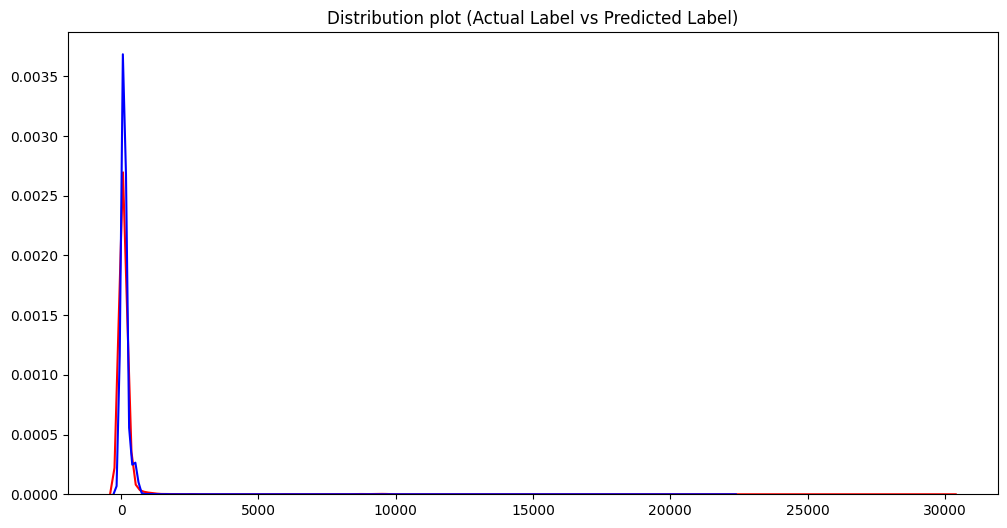

In [43]:
show_distribution_plot(valid_labels, y_hat)

#### Prediction

In [44]:
pred = pipeline.predict(test_data)

In [45]:
neg_index = np.where(pred < 0)
pred[neg_index] = np.abs(pred[neg_index])

In [46]:
pred

array([ 39.31517246, 478.74386283,  44.85543851, ..., 394.81795119,
        84.4035233 , 170.04528112])

## Stocastic Gradient Descent from Scratch

#### Algorithm

Certainly! Here's the algorithm for Stochastic Gradient Descent (SGD):

1. **Initialize Parameters**: 
   - Set initial values for parameters \( \theta \).
   - Choose learning rate \( \eta \) (step size).

2. **Repeat Until Convergence**:
   - Shuffle the dataset if necessary (optional for each epoch).
   - For each data point \( (x_i, y_i) \) in the dataset:
     1. Compute the gradient of the loss function with respect parameters
        
     2. Update the parameters using the gradients

3. **Return**: 
   - The optimized parameters

In [47]:
import numpy as np
from tqdm import  tqdm
from sklearn.utils import shuffle

class LinearRegression:
  def __init__(self,
               lr: float=0.001,
               epoch: int=10,
               clip_threshold: int=1):
    self.lr = lr
    self.epoch = epoch
    self.clip_threshold = clip_threshold

  def initialize_params(self, X):
    self.weights = np.random.randn(X.shape[1]) * (0.01)
    self.bias = 0

  def shuffle_data(self, X, y):
    X_shuffled, y_shuffled = shuffle(X, y, random_state=42)
    return X_shuffled, y_shuffled

  def compute_loss(self, X, Y=None):
    Y_hat = self.weights @ X.T + self.bias
    self.loss = (Y - Y_hat)**2 if Y else None
    return self.loss, Y_hat

  def get_error(self, Y, Y_hat):
    return (Y-Y_hat)

  def gradient_clipping(self, weights_grad, bias_grad):
    weights_grad = np.clip(weights_grad, -self.clip_threshold, self.clip_threshold)
    bias_grad = np.clip(bias_grad, -self.clip_threshold, self.clip_threshold)

    return weights_grad, bias_grad

  def update_params(self, X, Y, Y_hat):
    error = self.get_error(Y, Y_hat)
    self.bias += (self.lr * error)
    self.weights += (self.lr * error * X)

  def print_training_stats(self, **kwargs):
    epoch = kwargs["epoch"]
    batch = kwargs["batch"]
    loss = kwargs["loss"]

    print(f"Epoch: {epoch}, Batch: {batch} Loss: {loss}")
    

  def fit(self, X, Y):
    self.initialize_params(X)
    for i in tqdm(range(self.epoch)):
      
      print(f"Epoch: {i + 1}")
      X, Y = self.shuffle_data(X, Y)
      total_loss = 0
      for j in range(X.shape[0]):
        loss, Y_hat = self.compute_loss(X[j], Y[j])
        self.update_params(X[j], Y[j], Y_hat)
        total_loss += loss
      print(f"loss: {total_loss/X.shape[0]}")

  def predict(self, X):
    _, Y_hat = self.compute_loss(X)
    return Y_hat

In [48]:
def preprocess_for_lrsgd_scratch(df_train):
    dummy = pd.get_dummies(df_train["BHK_OR_RK"], dtype="int")
    df_train = pd.concat([df_train, dummy], axis=1)
    df_train.drop(["BHK_OR_RK"], axis=1, inplace=True)
    feature_names_test = ["UNDER_CONSTRUCTION", "RERA", "BHK_NO.", "SQUARE_FT", "READY_TO_MOVE", "RESALE", "BHK", "RK"]
    feature_names_train = feature_names_test + ["TARGET(PRICE_IN_LACS)"]

    df_train = df_train[feature_names_train]
    
    X = df_train.drop("TARGET(PRICE_IN_LACS)", axis=1).values
    y = df_train["TARGET(PRICE_IN_LACS)"].values

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    
    return X_train, X_val, y_train, y_val
    
    



In [49]:
X_train, X_val, y_train, y_val = preprocess_for_lrsgd_scratch(df_train)
scaler = StandardScaler()
scaler = scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [50]:
lr_model = LinearRegression(lr=0.00001, epoch=100, clip_threshold=1)
lr_model.fit(X_train_scaled, y_train)

  2%|▏         | 2/100 [00:00<00:08, 11.18it/s]

Epoch: 1
loss: 398082.0059761518
Epoch: 2
loss: 366873.8741713837
Epoch: 3


  4%|▍         | 4/100 [00:00<00:08, 11.50it/s]

loss: 348147.48470447626
Epoch: 4
loss: 336518.01060937624
Epoch: 5
loss: 329532.09394238767
Epoch: 6


  8%|▊         | 8/100 [00:00<00:08, 11.47it/s]

loss: 325388.45313743973
Epoch: 7
loss: 322786.16056101146
Epoch: 8
loss: 321273.5136521538
Epoch: 9


 10%|█         | 10/100 [00:00<00:07, 11.68it/s]

loss: 320282.3256626343
Epoch: 10
loss: 319677.7103163322
Epoch: 11
loss: 319322.94495276886
Epoch: 12


 14%|█▍        | 14/100 [00:01<00:07, 11.41it/s]

loss: 319107.0522091822
Epoch: 13
loss: 318918.7682779178
Epoch: 14
loss: 318803.01698411186
Epoch: 15


 16%|█▌        | 16/100 [00:01<00:07, 11.44it/s]

loss: 318787.15276643174
Epoch: 16
loss: 318713.4614113069
Epoch: 17
loss: 318736.9831966689
Epoch: 18


 20%|██        | 20/100 [00:01<00:06, 11.48it/s]

loss: 318683.8894917791
Epoch: 19
loss: 318718.14276049635
Epoch: 20
loss: 318713.0717383057
Epoch: 21


 22%|██▏       | 22/100 [00:01<00:06, 11.43it/s]

loss: 318704.7638582336
Epoch: 22
loss: 318661.17496370664
Epoch: 23
loss: 318705.73558510304
Epoch: 24


 24%|██▍       | 24/100 [00:02<00:06, 11.34it/s]

loss: 318664.5439805045
Epoch: 25
loss: 318704.1270628956
Epoch: 26


 27%|██▋       | 27/100 [00:02<00:09,  7.97it/s]

loss: 318701.9507716152
Epoch: 27
loss: 318704.0528098158
Epoch: 28


 29%|██▉       | 29/100 [00:02<00:08,  8.30it/s]

loss: 318695.9677790185
Epoch: 29
loss: 318650.8675522994
Epoch: 30


 32%|███▏      | 32/100 [00:03<00:07,  9.22it/s]

loss: 318661.2018293319
Epoch: 31
loss: 318702.35189181846
Epoch: 32
loss: 318663.50822404714
Epoch: 33


 34%|███▍      | 34/100 [00:03<00:06,  9.79it/s]

loss: 318669.5845064966
Epoch: 34
loss: 318716.4469322137
Epoch: 35
loss: 318666.21664600825
Epoch: 36


 38%|███▊      | 38/100 [00:03<00:05, 10.64it/s]

loss: 318660.4948813982
Epoch: 37
loss: 318679.0671913677
Epoch: 38
loss: 318678.82853843353
Epoch: 39


 40%|████      | 40/100 [00:03<00:05, 10.80it/s]

loss: 318711.2205568495
Epoch: 40
loss: 318675.85878013197
Epoch: 41
loss: 318712.60306645185
Epoch: 42


 42%|████▏     | 42/100 [00:04<00:05, 10.93it/s]

loss: 318670.2363564781
Epoch: 43
loss: 318714.07578837936
Epoch: 44


 46%|████▌     | 46/100 [00:04<00:05, 10.33it/s]

loss: 318663.9797227961
Epoch: 45
loss: 318665.9597714475
Epoch: 46
loss: 318719.6155709081
Epoch: 47


 48%|████▊     | 48/100 [00:04<00:05, 10.25it/s]

loss: 318710.50055592647
Epoch: 48
loss: 318703.7029941426
Epoch: 49
loss: 318689.7575879158
Epoch: 50


 52%|█████▏    | 52/100 [00:05<00:04, 11.00it/s]

loss: 318663.08396758646
Epoch: 51
loss: 318704.0370069698
Epoch: 52
loss: 318664.0097926287
Epoch: 53


 54%|█████▍    | 54/100 [00:05<00:04, 11.01it/s]

loss: 318706.9350582669
Epoch: 54
loss: 318704.0830384418
Epoch: 55
loss: 318655.8485345048
Epoch: 56


 58%|█████▊    | 58/100 [00:05<00:03, 10.96it/s]

loss: 318707.09795855766
Epoch: 57
loss: 318662.06534495077
Epoch: 58
loss: 318709.2226362416
Epoch: 59


 60%|██████    | 60/100 [00:05<00:03, 10.98it/s]

loss: 318703.5133361685
Epoch: 60
loss: 318692.96043400007
Epoch: 61
loss: 318701.8286885093
Epoch: 62


 64%|██████▍   | 64/100 [00:06<00:03, 11.13it/s]

loss: 318700.28577831225
Epoch: 63
loss: 318661.4262641044
Epoch: 64
loss: 318659.8696925944
Epoch: 65


 66%|██████▌   | 66/100 [00:06<00:03, 10.87it/s]

loss: 318667.9028781849
Epoch: 66
loss: 318708.71487791545
Epoch: 67
loss: 318707.2120160033
Epoch: 68


 70%|███████   | 70/100 [00:06<00:02, 10.98it/s]

loss: 318659.58481290535
Epoch: 69
loss: 318668.7002969256
Epoch: 70
loss: 318662.8222948178
Epoch: 71


 72%|███████▏  | 72/100 [00:06<00:02, 10.96it/s]

loss: 318717.3599025905
Epoch: 72
loss: 318709.3087880986
Epoch: 73
loss: 318704.09542429383
Epoch: 74


 76%|███████▌  | 76/100 [00:07<00:02, 11.19it/s]

loss: 318661.04639167857
Epoch: 75
loss: 318707.6008583484
Epoch: 76
loss: 318695.9251566142
Epoch: 77


 78%|███████▊  | 78/100 [00:07<00:01, 11.13it/s]

loss: 318661.36298395006
Epoch: 78
loss: 318664.19054200343
Epoch: 79
loss: 318671.03618320904
Epoch: 80


 82%|████████▏ | 82/100 [00:07<00:01, 11.14it/s]

loss: 318673.26254084485
Epoch: 81
loss: 318678.22051800514
Epoch: 82
loss: 318683.9796217147
Epoch: 83


 84%|████████▍ | 84/100 [00:07<00:01, 11.08it/s]

loss: 318724.88047655305
Epoch: 84
loss: 318678.51323592087
Epoch: 85
loss: 318678.25516199344
Epoch: 86


 88%|████████▊ | 88/100 [00:08<00:01, 11.47it/s]

loss: 318683.553930789
Epoch: 87
loss: 318686.58413043077
Epoch: 88
loss: 318725.7053599159
Epoch: 89


 90%|█████████ | 90/100 [00:08<00:01,  9.49it/s]

loss: 318716.3445245104
Epoch: 90
loss: 318672.1753786618
Epoch: 91
loss: 318712.5091793149
Epoch: 92


 94%|█████████▍| 94/100 [00:08<00:00, 10.47it/s]

loss: 318705.7842817341
Epoch: 93
loss: 318703.3358106956
Epoch: 94
loss: 318702.1161463208
Epoch: 95


 96%|█████████▌| 96/100 [00:09<00:00, 10.73it/s]

loss: 318648.37061671156
Epoch: 96
loss: 318705.5051914206
Epoch: 97
loss: 318660.8100649795
Epoch: 98


100%|██████████| 100/100 [00:09<00:00, 10.62it/s]

loss: 318706.9723564252
Epoch: 99
loss: 318706.056116819
Epoch: 100
loss: 318660.70305448596


In [51]:
# Evaluating Stochastic Gradient Descent From Scratch
y_hat = lr_model.predict(X_val_scaled)
r2_score(y_val, y_hat)

r2_sgd_scratch = r2_score(y_val, y_hat)
mean_squared_error_sgd_scratch = mean_squared_error(y_val, y_hat)
mean_squared_error_sgd_scratch

371980.47684652015

## Batch Gradient Descent

In [52]:
numerical_features_standard = ['BHK_NO.', 'SQUARE_FT', 'LONGITUDE', 'LATITUDE']
numerical_transformer_standard = Pipeline(steps=[
    ('standard_scaler', StandardScaler())
])


In [53]:
# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num_minmax', numerical_transformer_standard, numerical_features_standard)
    ],
    remainder='passthrough' 
)


In [54]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [55]:
total_training_samples = df_train.shape[0]
total_training_samples

29050

In [56]:
from sklearn.base import BaseEstimator, RegressorMixin

In [57]:
def batches(X, y, chunksize, num_samples):
  start = 0
  while start < num_samples:
    end = min(start + chunksize, num_samples)
    X_chunk, y_chunk = X[start:end], y[start:end]
    yield X_chunk, y_chunk
    start += chunksize
    


In [58]:
from sklearn.linear_model import LinearRegression

num_samples = X_train.shape[0]
batch_iterator = batches(X_train_scaled, y_train, num_samples, num_samples)
model = SGDRegressor(max_iter=100, eta0=0.0001)

for X_chunk, y_chunk in batch_iterator:
  model.partial_fit(X_chunk, y_chunk)

In [59]:

## Evaluation R2 score
y_pred = model.predict(X_val_scaled)
r2_sgd_batch = r2_score(y_val, y_pred)
root_mean_squared_error_batch = np.sqrt(mean_squared_error(y_val, y_pred))
root_mean_squared_error_batch

699.8636789132277

#### Batch Gradient Descent from Scratch

In [60]:
class BatchLinearRegression:
  def __init__(self,
               m: int,
               lr: float=0.01,
               epoch: int=10,
               clip_threshold: int=1):
    self.m = m
    self.lr = lr
    self.epoch = epoch
    self.clip_threshold = clip_threshold


  def initialize_params(self, X):
    # self.weights = np.random.randn(X.shape[1]) * np.sqrt(2/(X.shape[1] + 1))
    self.weights = np.random.randn(X.shape[1]) * 0.001
    self.bias = 0

  def compute_loss(self, X, Y=None):
    Y_hat = X @ self.weights + self.bias
    self.loss = np.sum((Y - Y_hat)**2)/(2*self.m) if Y is not None else None

    return self.loss, Y_hat

  def get_error(self, Y, Y_hat):
    error = Y - Y_hat
    error = error.reshape(Y.shape[0], 1)
    return error

  def update_params(self, X, Y, Y_hat):
    error = self.get_error(Y, Y_hat)
    dW = - (1 / (2 * self.m)) * (X.T @ error)
    dW = dW.reshape(self.weights.shape)
    dB = - (1 / (2 * self.m)) * np.sum(error)

    self.weights -= self.lr * dW
    self.bias -= self.lr * dB

  def fit(self, X, Y):
    self.initialize_params(X)
    total_loss = 0

    for i in tqdm(range(self.epoch)):
      print(f"Epoch: {i + 1}")
      loss, Y_hat = self.compute_loss(X, Y)
      print(f"Loss: {loss}")
      self.update_params(X, Y, Y_hat)
      # print(f"Updated Weights: {self.weights}")

  def predict(self, X):
    _, Y_hat = self.compute_loss(X)
    return Y_hat


In [61]:
## Trainig Batch Gradient Descent

lr_model_batch = BatchLinearRegression(X_train_scaled.shape[0], lr=0.001, epoch=500, clip_threshold=1)
lr_model_batch.fit(X_train_scaled, y_train)

  4%|▍         | 20/500 [00:00<00:02, 186.45it/s]

Epoch: 1
Loss: 205450.68015461025
Epoch: 2
Loss: 205402.21212236377
Epoch: 3
Loss: 205353.79937596552
Epoch: 4
Loss: 205305.4418423017
Epoch: 5
Loss: 205257.13944837597
Epoch: 6
Loss: 205208.8921213091
Epoch: 7
Loss: 205160.69978833882
Epoch: 8
Loss: 205112.5623768197
Epoch: 9
Loss: 205064.47981422264
Epoch: 10
Loss: 205016.45202813484
Epoch: 11
Loss: 204968.47894625968
Epoch: 12
Loss: 204920.5604964162
Epoch: 13
Loss: 204872.6966065392
Epoch: 14
Loss: 204824.88720467876
Epoch: 15
Loss: 204777.13221900017
Epoch: 16
Loss: 204729.4315777837
Epoch: 17
Loss: 204681.78520942418
Epoch: 18
Loss: 204634.1930424312
Epoch: 19
Loss: 204586.65500542836
Epoch: 20
Loss: 204539.17102715358
Epoch: 21
Loss: 204491.74103645835
Epoch: 22
Loss: 204444.36496230814
Epoch: 23
Loss: 204397.0427337814
Epoch: 24
Loss: 204349.77428007018
Epoch: 25
Loss: 204302.55953047925
Epoch: 26
Loss: 204255.39841442616
Epoch: 27
Loss: 204208.29086144123
Epoch: 28
Loss: 204161.23680116676
Epoch: 29
Loss: 204114.23616335736
Ep

 12%|█▏        | 60/500 [00:00<00:02, 192.31it/s]

Epoch: 39
Loss: 203647.15264658834
Epoch: 40
Loss: 203600.73505154907
Epoch: 41
Loss: 203554.3700446973
Epoch: 42
Loss: 203508.05755722572
Epoch: 43
Loss: 203461.79752043626
Epoch: 44
Loss: 203415.58986573984
Epoch: 45
Loss: 203369.43452465587
Epoch: 46
Loss: 203323.33142881253
Epoch: 47
Loss: 203277.28050994626
Epoch: 48
Loss: 203231.2816999016
Epoch: 49
Loss: 203185.334930631
Epoch: 50
Loss: 203139.44013419462
Epoch: 51
Loss: 203093.5972427602
Epoch: 52
Loss: 203047.80618860267
Epoch: 53
Loss: 203002.06690410402
Epoch: 54
Loss: 202956.3793217534
Epoch: 55
Loss: 202910.7433741463
Epoch: 56
Loss: 202865.15899398486
Epoch: 57
Loss: 202819.6261140776
Epoch: 58
Loss: 202774.14466733896
Epoch: 59
Loss: 202728.71458678934
Epoch: 60
Loss: 202683.33580555482
Epoch: 61
Loss: 202638.00825686686
Epoch: 62
Loss: 202592.7318740624
Epoch: 63
Loss: 202547.50659058325
Epoch: 64
Loss: 202502.33233997622
Epoch: 65
Loss: 202457.20905589277
Epoch: 66
Loss: 202412.1366720889
Epoch: 67
Loss: 202367.1151224

 23%|██▎       | 117/500 [00:00<00:01, 245.57it/s]

Loss: 202142.7675785843
Epoch: 73
Loss: 202098.04965063895
Epoch: 74
Loss: 202053.3820967585
Epoch: 75
Loss: 202008.76485163037
Epoch: 76
Loss: 201964.19785004455
Epoch: 77
Loss: 201919.68102689335
Epoch: 78
Loss: 201875.21431717117
Epoch: 79
Loss: 201830.7976559745
Epoch: 80
Loss: 201786.4309785013
Epoch: 81
Loss: 201742.11422005147
Epoch: 82
Loss: 201697.84731602596
Epoch: 83
Loss: 201653.63020192695
Epoch: 84
Loss: 201609.46281335776
Epoch: 85
Loss: 201565.34508602237
Epoch: 86
Loss: 201521.27695572545
Epoch: 87
Loss: 201477.25835837203
Epoch: 88
Loss: 201433.28922996734
Epoch: 89
Loss: 201389.36950661676
Epoch: 90
Loss: 201345.49912452538
Epoch: 91
Loss: 201301.67801999807
Epoch: 92
Loss: 201257.90612943907
Epoch: 93
Loss: 201214.183389352
Epoch: 94
Loss: 201170.50973633956
Epoch: 95
Loss: 201126.88510710336
Epoch: 96
Loss: 201083.30943844368
Epoch: 97
Loss: 201039.78266725942
Epoch: 98
Loss: 200996.3047305478
Epoch: 99
Loss: 200952.8755654042
Epoch: 100
Loss: 200909.49510902204
Ep

 62%|██████▏   | 311/500 [00:00<00:00, 541.20it/s]

Loss: 195812.8641295781
Epoch: 227
Loss: 195775.19145919642
Epoch: 228
Loss: 195737.56020573774
Epoch: 229
Loss: 195699.97031762465
Epoch: 230
Loss: 195662.42174335688
Epoch: 231
Loss: 195624.914431511
Epoch: 232
Loss: 195587.44833074042
Epoch: 233
Loss: 195550.02338977525
Epoch: 234
Loss: 195512.639557422
Epoch: 235
Loss: 195475.29678256367
Epoch: 236
Loss: 195437.99501415947
Epoch: 237
Loss: 195400.7342012447
Epoch: 238
Loss: 195363.5142929306
Epoch: 239
Loss: 195326.33523840428
Epoch: 240
Loss: 195289.19698692852
Epoch: 241
Loss: 195252.0994878417
Epoch: 242
Loss: 195215.04269055757
Epoch: 243
Loss: 195178.02654456513
Epoch: 244
Loss: 195141.0509994286
Epoch: 245
Loss: 195104.11600478718
Epoch: 246
Loss: 195067.22151035487
Epoch: 247
Loss: 195030.36746592054
Epoch: 248
Loss: 194993.55382134762
Epoch: 249
Loss: 194956.780526574
Epoch: 250
Loss: 194920.04753161184
Epoch: 251
Loss: 194883.3547865476
Epoch: 252
Loss: 194846.70224154173
Epoch: 253
Loss: 194810.08984682872
Epoch: 254
Loss

 86%|████████▌ | 428/500 [00:00<00:00, 534.38it/s]

Epoch: 352
Loss: 191376.2162111341
Epoch: 353
Loss: 191343.37965910407
Epoch: 354
Loss: 191310.57858951658
Epoch: 355
Loss: 191277.81295949483
Epoch: 356
Loss: 191245.08272622325
Epoch: 357
Loss: 191212.387846948
Epoch: 358
Loss: 191179.72827897637
Epoch: 359
Loss: 191147.10397967717
Epoch: 360
Loss: 191114.51490648018
Epoch: 361
Loss: 191081.96101687624
Epoch: 362
Loss: 191049.44226841704
Epoch: 363
Loss: 191016.95861871543
Epoch: 364
Loss: 190984.51002544462
Epoch: 365
Loss: 190952.0964463385
Epoch: 366
Loss: 190919.71783919176
Epoch: 367
Loss: 190887.37416185907
Epoch: 368
Loss: 190855.06537225575
Epoch: 369
Loss: 190822.7914283571
Epoch: 370
Loss: 190790.55228819867
Epoch: 371
Loss: 190758.34790987585
Epoch: 372
Loss: 190726.17825154404
Epoch: 373
Loss: 190694.0432714183
Epoch: 374
Loss: 190661.94292777352
Epoch: 375
Loss: 190629.87717894392
Epoch: 376
Loss: 190597.84598332347
Epoch: 377
Loss: 190565.84929936528
Epoch: 378
Loss: 190533.8870855818
Epoch: 379
Loss: 190501.9593005447


100%|██████████| 500/500 [00:01<00:00, 436.89it/s]

Epoch: 448
Loss: 188379.77907020747
Epoch: 449
Loss: 188350.1617673928
Epoch: 450
Loss: 188320.57609695298
Epoch: 451
Loss: 188291.0220214618
Epoch: 452
Loss: 188261.49950354514
Epoch: 453
Loss: 188232.00850588095
Epoch: 454
Loss: 188202.5489911993
Epoch: 455
Loss: 188173.1209222821
Epoch: 456
Loss: 188143.72426196313
Epoch: 457
Loss: 188114.35897312794
Epoch: 458
Loss: 188085.02501871355
Epoch: 459
Loss: 188055.72236170885
Epoch: 460
Loss: 188026.45096515398
Epoch: 461
Loss: 187997.21079214054
Epoch: 462
Loss: 187968.00180581148
Epoch: 463
Loss: 187938.82396936096
Epoch: 464
Loss: 187909.67724603426
Epoch: 465
Loss: 187880.56159912757
Epoch: 466
Loss: 187851.47699198828
Epoch: 467
Loss: 187822.42338801463
Epoch: 468
Loss: 187793.40075065536
Epoch: 469
Loss: 187764.4090434103
Epoch: 470
Loss: 187735.44822982964
Epoch: 471
Loss: 187706.5182735142
Epoch: 472
Loss: 187677.61913811517
Epoch: 473
Loss: 187648.75078733423
Epoch: 474
Loss: 187619.91318492327
Epoch: 475
Loss: 187591.1062946843

In [62]:
# Evaluating Batch Gradient Descent from scratch

y_hat_batch = lr_model_batch.predict(X_val_scaled)
r2_sgd_batch_scratch = r2_score(y_val, y_hat_batch)
root_mean_squared_error_batch_scratch = np.sqrt(mean_squared_error(y_val, y_hat_batch))
root_mean_squared_error_batch_scratch

707.5444128533871

In [63]:
results_dict = {
    'SGD scikit-learn': r2_sgd_linear,
    'SGD Scratch': r2_sgd_scratch,
    'Batch scikit-learn': r2_sgd_batch,
    'Batch Scratch': r2_sgd_batch_scratch
}

In [64]:
summary = pd.DataFrame(list(results_dict.items()), columns=['Method', 'R2 Score'])

In [65]:
summary

,Method,R2 Score
0,SGD scikit-learn,0.308877
1,SGD Scratch,0.320667
2,Batch scikit-learn,0.105481
3,Batch Scratch,0.085739


Here, looks like SGD from scratch has better performance than others with the R2 of 0.32

`Stochastic Gradient Descent` (SGD) calculates the gradient using a single training example at each step, resulting in noisier gradient updates. These updates are quicker because they use just one training example, allowing for faster parameter adjustments and potentially faster convergence.

`Batch Gradient Descent`, on the other hand, uses the entire training dataset to compute the gradient. This method can be computationally intensive and slow, particularly with large datasets, but it provides a more accurate direction for parameter updates.